## Ising model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 2
B = 0
J = 1.0
k = 1.0
mesh_x, mesh_y = 50, 50
spin = -np.ones((mesh_x, mesh_y))
num_ensembles = 200000
save_every = 10000 # for animation
average_spin = np.zeros(num_ensembles)

### $\Delta E$ calculation
The energy of the system is,
$$ E = -\frac{J}{2} \sum_{i}^{N} \sum_{j}^{Z} s_i s_j + B\sum_{i}^{N} s_i $$
On flipping the spin at $k$ from $s_k$ to $-s_k$, the change in energy
$$ \Delta E = 2Js_k \sum_{i}^{Z} s_i + 2Bs_k $$

In [3]:
def calculate_deltaE(x, y):
    # assuming periodic boundaries
    spin_L = spin[ (x-1)%mesh_x, y ] # left spin
    spin_R = spin[ (x+1)%mesh_x, y ] # right spin
    spin_U = spin[ x, (y+1)%mesh_y ] # up spin
    spin_D = spin[ x, (y-1)%mesh_y ] # down spin
    
    deltaE = 2.0*J*spin[x, y]*(spin_L + spin_R + spin_U + spin_D) + 2.0*B*spin[x, y]
    return deltaE

### Metropolis

In [4]:
ims = [] # python list (similiar to numpy array) required for saving images to create videos
fig = plt.figure() # creates figure window to display animation
for i in range(num_ensembles):
    x, y = np.random.randint(mesh_x), np.random.randint(mesh_y)
    deltaE = calculate_deltaE(x, y)
    if deltaE < 0.0: # flip the spin
        spin[x, y] = -spin[x, y]
    else: # flip the spin with a probability
        rv = np.random.random()
        if rv < np.exp( -deltaE/(k*T) ):
            spin[x, y] = -spin[x, y]
        else:
            spin[x, y] = spin[x, y] # keep the previous spin (reject the flip)
    average_spin[i] = np.average(spin)
    if i%save_every == 0:
        ### to show plot
        # plot spin state
#         plt.imshow(spin)
#         plt.title('t = ' + str(i))
#         plt.colorbar()
#         plt.show()
        ### to create animation
        im = plt.imshow(spin)
        ims.append([im]) # adding image to array storing all images

# to create animation       
import matplotlib.animation as animation
from IPython.display import HTML
anim = animation.ArtistAnimation(fig, ims, interval=600, blit=True, repeat_delay=2000)
plt.close(anim._fig)
HTML(anim.to_html5_video())
# anim.save('spin.mp4', codec='h264') # to save video as mp4

### Plot average magnetization with steps

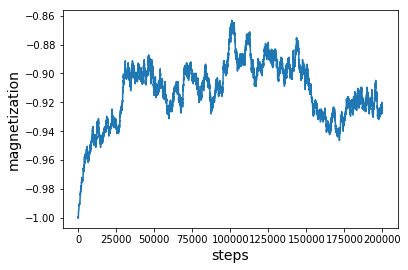

avg_magnetization = -0.907637704


In [5]:
plt.plot(average_spin)
plt.xlabel('steps', fontsize=14)
plt.ylabel('magnetization', fontsize=14)
plt.show()
avg_magnetization = np.average(average_spin[100000:]) # taking average after equilibrium attained
print('avg_magnetization =', avg_magnetization)